In [46]:
import findspark
findspark.init()

import pyspark
# sc = pyspark.SparkContext()

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)
from pyspark.sql.types import *
from datetime import datetime

# counterpoint_data = sc.textFile('../DataMining/Export.csv')
# print(counterpoint_data.collect())


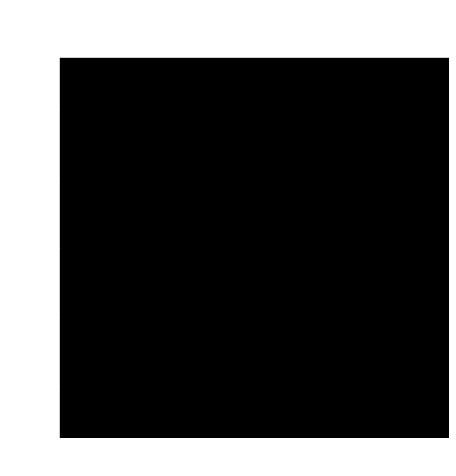

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

x_axis = [i+1 for i in range(11)]
y_axis = []

for i in range(11):
    try:
        y_axis.append(counterpoint_data[i][8]['Gemiddeld aantal fietsers'])
    except:
        y_axis.append(0)

fig1 = plt.figure(figsize=(7, 7))
fig1.suptitle('Gemiddelde passages per station', fontsize=14)
ax = fig1.add_subplot(111)
ax.set_xlabel('fietstelpunt')
ax.set_ylabel('Aantal fietsers')
ax.bar(x_axis, y_axis, fc='red', align='center')
plt.show()


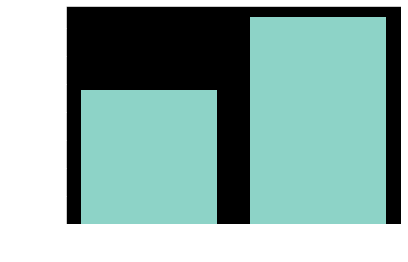

In [76]:
df = sqlContext.read.format('com.databricks.spark.csv').options(header='true').load('Export.csv')
df.registerTempTable('tempTable')

totalPerYear = []

for i in range(2):
    Year = 2015 + i
    statement = "SELECT SUM (`Gemiddeld aantal fietsers`) AS `totaal` FROM tempTable WHERE Jaar =" + str(Year)
    bikeData = sqlContext.sql(statement).collect()
    totalPerYear.append(bikeData[0][0])

%matplotlib inline
import matplotlib.pyplot as plt

years = ["2015", "2016"]
data = [totalPerYear[0], totalPerYear[1]]

plt.ylabel("Aantal Fietsers")
plt.xlabel("Jaar")
plt.bar(years, data)
plt.show()      